<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt


%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = "Sacramento_transactions.csv"

In [3]:
data = pd.read_csv(house_csv)
data.head()

street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768

In [8]:
data.shape

(985, 12)

In [9]:
data.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [11]:
# zip is catagorical value so should be converted to string
data['zip'] = data['zip'].astype(str)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [13]:
data.describe()

beds       baths       sq__ft          price    latitude  \
count  985.000000  985.000000   985.000000     985.000000  985.000000   
mean     2.911675    1.776650  1314.916751  234144.263959   38.607732   
std      1.307932    0.895371   853.048243  138365.839085    0.145433   
min      0.000000    0.000000     0.000000    1551.000000   38.241514   
25%      2.000000    1.000000   952.000000  145000.000000   38.482717   
50%      3.000000    2.000000  1304.000000  213750.000000   38.626582   
75%      4.000000    2.000000  1718.000000  300000.000000   38.695589   
max      8.000000    5.000000  5822.000000  884790.000000   39.020808   

        longitude  
count  985.000000  
mean  -121.355982  
std      0.138278  
min   -121.551704  
25%   -121.446127  
50%   -121.376220  
75%   -121.295778  
max   -120.597599

In [14]:
data[data['beds']==0]

street             city    zip state  beds  baths  \
73              17 SERASPI CT       SACRAMENTO  95834    CA     0      0   
89           2866 KARITSA AVE       SACRAMENTO  95833    CA     0      0   
100     12209 CONSERVANCY WAY   RANCHO CORDOVA  95742    CA     0      0   
121       5337 DUSTY ROSE WAY   RANCHO CORDOVA  95742    CA     0      0   
126       2115 SMOKESTACK WAY       SACRAMENTO  95833    CA     0      0   
..                        ...              ...    ...   ...   ...    ...   
901  1530 TOPANGA LN Unit 204          LINCOLN  95648    CA     0      0   
917            501 POPLAR AVE  WEST SACRAMENTO  95691    CA     0      0   
934  1550 TOPANGA LN Unit 207          LINCOLN  95648    CA     0      0   
947     1525 PENNSYLVANIA AVE  WEST SACRAMENTO  95691    CA     0      0   
970             3557 SODA WAY       SACRAMENTO  95834    CA     0      0   

     sq__ft         type                     sale_date   price   latitude  \
73        0  Residential  Wed May 21 00:00:00 EDT 2008  206000  38.631481   
89        0  Residential  Wed May 21 00:00:00 EDT 2008  244500  38.626671   
100       0  Residential  Wed May 21 00:00:00 EDT 2008  263500  38.553867   
121       0  Residential  Wed May 21 00:00:00 EDT 2008  320000  38.528575   
126       0  Residential  Wed May 21 00:00:00 EDT 2008  339500  38.602416   
..      ...          ...                           ...     ...        ...   
901       0        Condo  Thu May 15 00:00:00 EDT 2008  138000  38.884150   
917       0  Residential  Thu May 15 00:00:00 EDT 2008  165000  38.584526   
934       0        Condo  Thu May 15 00:00:00 EDT 2008  188000  38.884170   
947       0  Residential  Thu May 15 00:00:00 EDT 2008  200100  38.569943   
970       0  Residential  Thu May 15 00:00:00 EDT 2008  224000  38.631026   

      longitude  
73  -121.501880  
89  -121.525970  
100 -121.219141  
121 -121.228600  
126 -121.542965  
..          ...  
901 -121.270277  
917 -121.534609  
934 -121.270222  
947 -121.527539  
970 -121.501879  

[108 rows x 12 columns]

<AxesSubplot:>

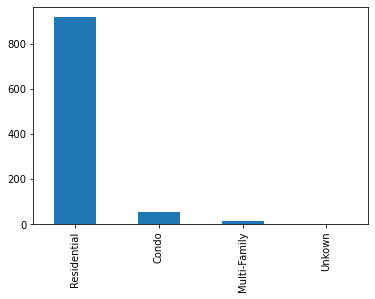

In [15]:
data['type'].value_counts().plot(kind='bar')

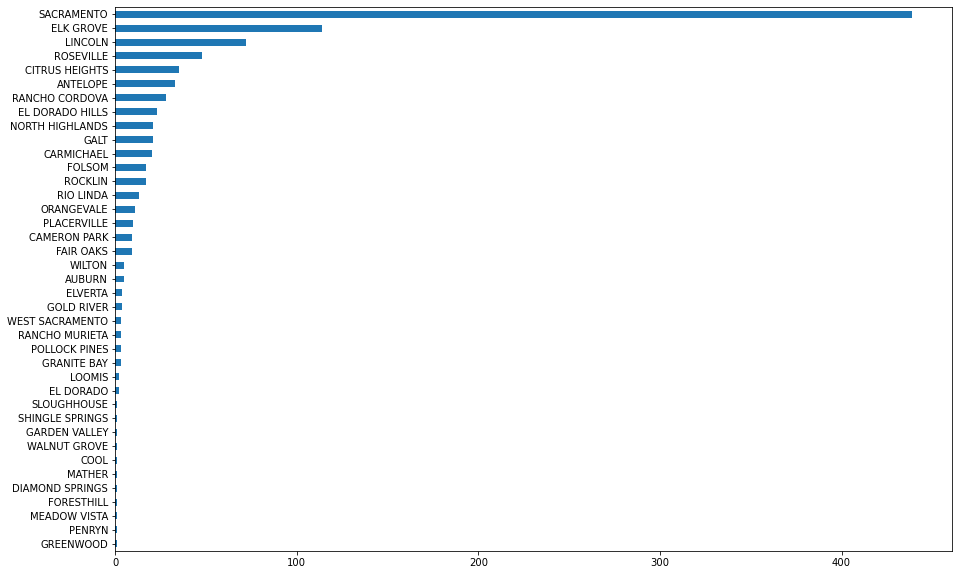

In [16]:
data['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

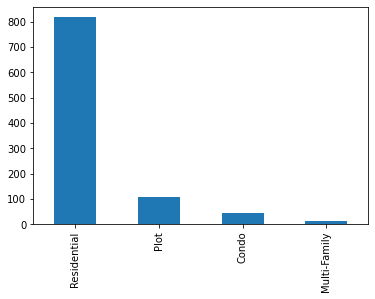

In [17]:
#create new type that contains zero beds, baths, sqft
data.loc[data['beds']==0, 'type'] = 'Plot'
data['type'].value_counts().plot(kind='bar')
plt.show()

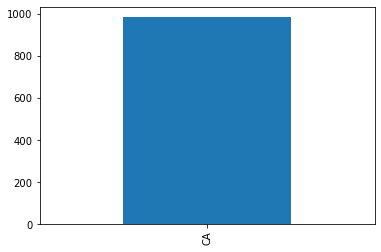

In [18]:
data['state'].value_counts().plot(kind='bar');

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER
#price is dependent variable that we can use as our target variable based on other predictor variables

In [57]:
#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [ ]:
# ANSWER
# beds
# baths
# sqft
#type

In [5]:
def draw_scatter_plot(X, Y):
    fig = plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.scatter(X, Y, c='b')
    
    plt.show();
    

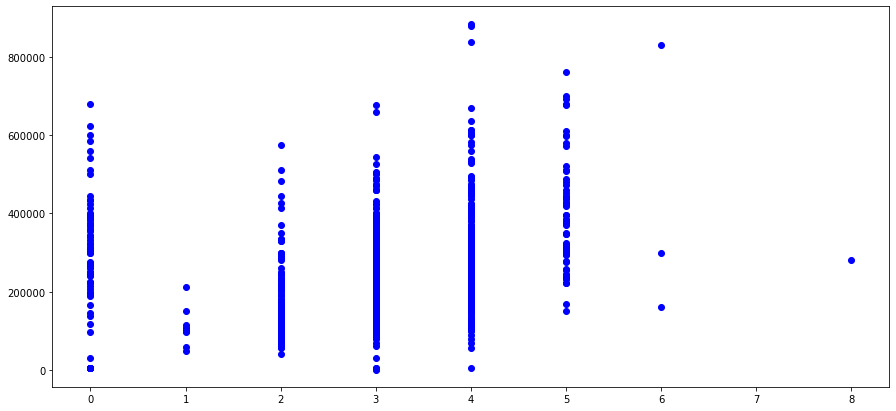

In [20]:
draw_scatter_plot(data['beds'], data['price'])

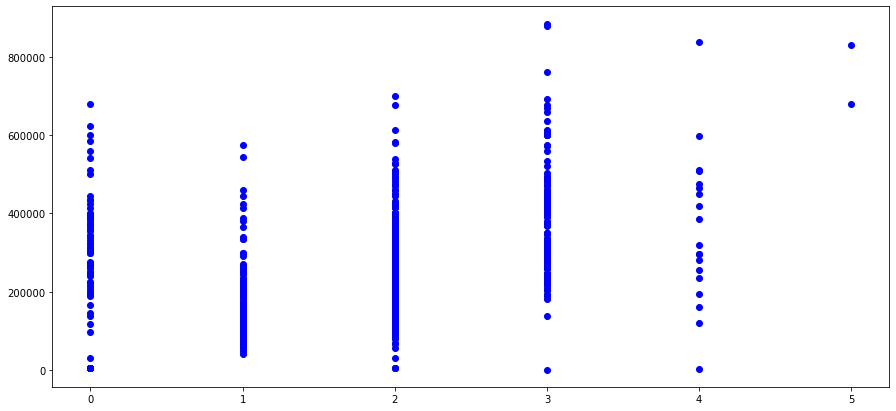

In [21]:
draw_scatter_plot(data['baths'], data['price'])

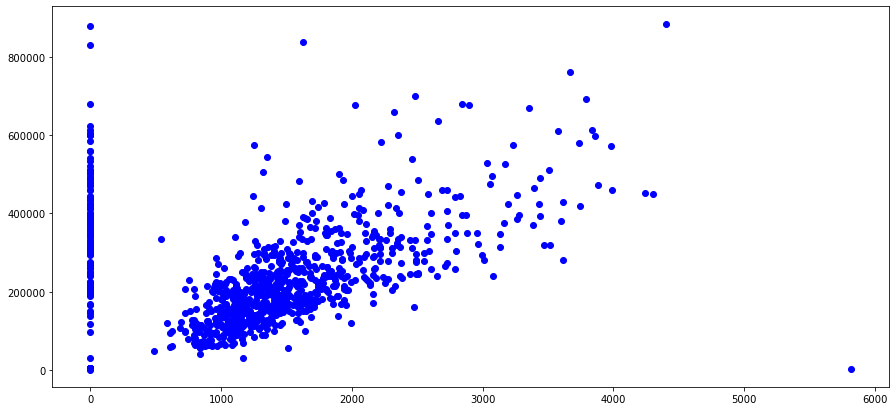

In [22]:
draw_scatter_plot(data['sq__ft'], data['price'])

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

<AxesSubplot:>

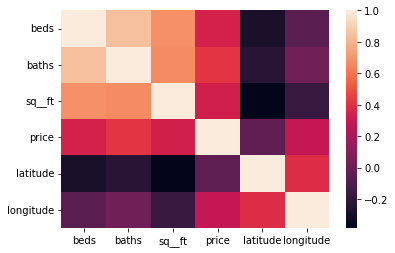

In [23]:
# ANSWER
sns.heatmap(data.corr())

In [24]:
import folium
import pandas as pd
#make an empty map
#38.63, -121.38 is at the middle 50% mark location of CA
m = folium.Map(location=[38.626582, -121.376220], zoom_start=10)

#add marker to the map
for i in range(0, len(data.head(985))):
    folium.Marker(
    location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']]
    ).add_to(m)
    
display(m)

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [ ]:
### sq_ft is the best predictor as it has stong relationship with beds, baths

In [4]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [7]:
# ANSWER

X = data['sq__ft'].values.reshape(-1,1)
Y = data['price']

linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699777


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [10]:
# ANSWER
linreg.score(X, Y)

0.11148717682951437

### 3. Splitting Data

In [5]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [8]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

#### 3.2 Check Shape, Sample of Test Train Data

In [21]:
# ANSWER
## Check training/test data
print("rows of X_train = ", X_train.shape[0])
print("rows of X_test = ", X_test.shape[0])
print("sample of X_train")
print(X_train[:10])
print("sample of X_test")
print(X_test[:10])

rows of X_train =  788
rows of X_test =  197
sample of X_train
[[2169]
 [1718]
 [1676]
 [ 984]
 [1751]
 [ 884]
 [1488]
 [1207]
 [1188]
 [   0]]
sample of X_test
[[1177]
 [   0]
 [1328]
 [1456]
 [ 975]
 [3037]
 [1477]
 [1887]
 [1574]
 [2170]]


In [22]:
print("rows of y_train = ", y_train.shape[0])
print("rows of y_test = ", y_test.shape[0])
print("sample of y_train")
print(y_train[:10])
print("sample of y_test")
print(y_test[:10])

rows of y_train =  788
rows of y_test =  197
sample of y_train
273    292000
300    361948
738    247000
703    210944
238    225000
905    147000
912    160000
365    119250
891    123675
541    488750
Name: price, dtype: int64
sample of y_test
7       91002
707    215000
678    188335
974    225000
103    271742
546    528000
49     168000
939    190000
257    255000
259    257729
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [24]:
# ANSWER
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.coef_, linreg.intercept_)

[55.13341974] 161325.2170658076


In [26]:
# ANSWER
linreg.score(X_test, y_test)

0.1014120452812407

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [27]:
# ANSWER
linreg.intercept_, linreg.coef_

(161325.2170658076, array([55.13341974]))

In [32]:
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1204

Ypred = beta1 * x + beta0
print("Predicted house price", Ypred[0])

Predicted house price 227705.8544330184


#### Find the error

In [33]:
# Predict price from X_test
y_preds = linreg.predict(X_test)
y_preds[:10]

array([226217.25210003, 161325.21706581, 234542.3984808 , 241599.47620755,
       215080.30131251, 328765.41281682, 242757.2780221 , 265361.98011558,
       248105.2197369 , 280964.73790206])

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_preds, squared=True)

16873410382.938444



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



